# 1 Package Loading and Preparing

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import random
# import pytorch_lightning as pl

# from gluonts.dataset.common import ListDataset
# from gluonts.dataset.util import to_pandas

# from pts.model.deepar import DeepAREstimator
# from pts import Trainer
import yfinance as yf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [3]:
## Fetch the Engery Sector SP500 Stocks


axp = yf.Ticker("AXP")
adj_close = axp.history(start = "2020-01-01", end = "2021-12-31")["Close"]
adj_close_df = pd.DataFrame(adj_close)
n = adj_close.shape[0]

sp500_index_train = yf.download('^GSPC', start='2020-01-01', end='2021-12-31')["Adj Close"]

split = 180
#sp500_index_train_2 = sp500_index_train[:split,]
sp500_index_test = yf.download('^GSPC', start='2022-01-01', end='2022-12-31')["Adj Close"]
print(sp500_index_test.head())

# Extract adjusted closing prices
print(adj_close.head())
print(n)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2022-01-03    4796.560059
2022-01-04    4793.540039
2022-01-05    4700.580078
2022-01-06    4696.049805
2022-01-07    4677.029785
Name: Adj Close, dtype: float64
Date
2020-01-02 00:00:00-05:00    119.306725
2020-01-03 00:00:00-05:00    118.121712
2020-01-06 00:00:00-05:00    117.609802
2020-01-07 00:00:00-05:00    116.993576
2020-01-08 00:00:00-05:00    119.012840
Name: Close, dtype: float64
504


# 2 Defining Diffusion Pipeline

In [36]:
import math
import scipy.stats
import numpy as np
## Forward Markov Chain
## Perturbing noise in the price until totally random

def corrput(data, beta = None, t = 200):
  """
  Inputs:
    data: A Series
    t: An positive integer
    beta: A list of hyperparameters that control the variance of the noise
          within the range of [0,1] and is non-decreasing
  Output: A Series
  This function addes noise to the stock data and returns this stock data but pertubed
    t times.
  """
  beta = beta = [0.003] * adj_close.shape[0] if beta == None else beta
  
  alpha_bar = 1
  for i in range(t):
    alpha_bar *= 1 - beta[i]
    #alpha.append(1 - beta[i]) # reparameterized by the last hypermeter
  
  for i in range(len(data)): # pertubing noise n times into each observations of data
    data.iloc[i,0] = math.sqrt(alpha_bar) * data.iloc[i,0] + math.sqrt(1 - alpha_bar) * random.normalvariate(0,1)
  return data


class DiffusionModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(DiffusionModel, self).__init__()
    # Define the architecture using reversible transformations

  def forward(self, x):
    # Implement the forward pass through reversible transformations
    return x

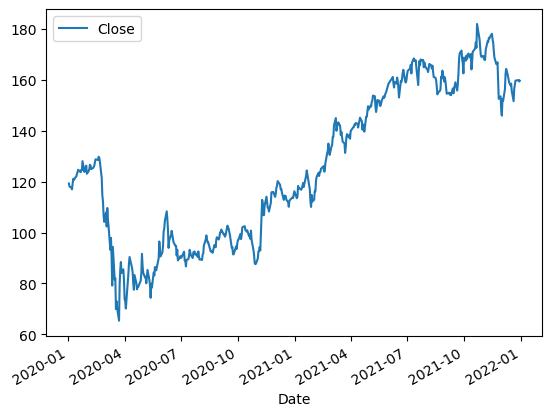

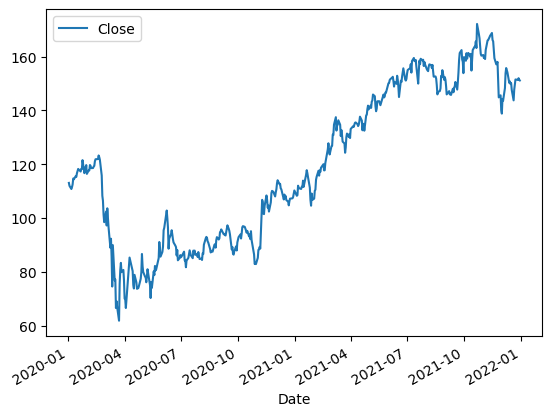

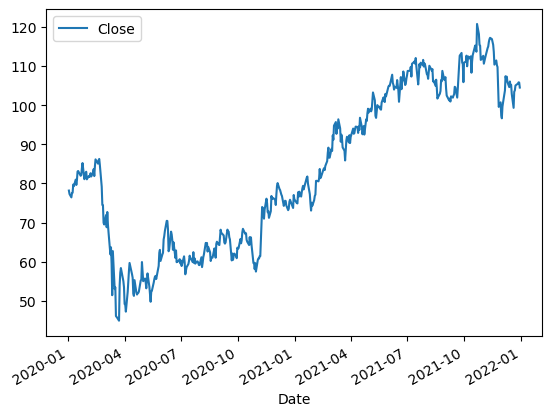

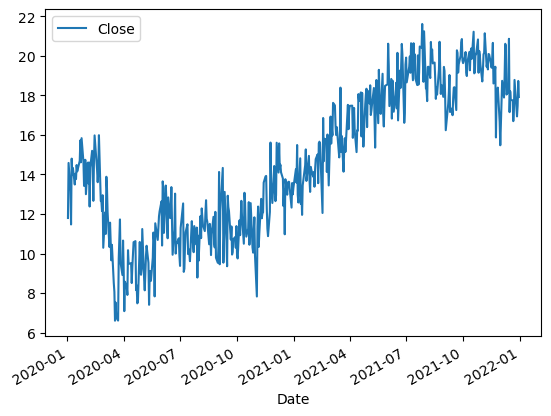

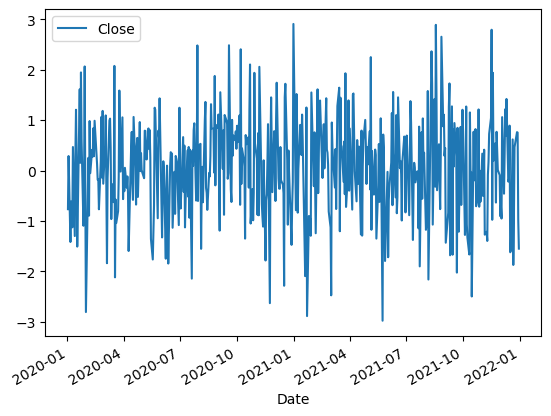

In [40]:
## Demo for the Noise Perturbing
cor_axp = adj_close_df.copy()

for time in range(100):# add noise 10 times
  if time in [0, 9, 24, 54, 99]:
    cor_axp.plot()
  cor_axp = corrput(cor_axp, t =time) # add noise once

# 3 Denoising NN training 

In [ ]:
def getCost(X, y, theta):
    """
    Compute the cost of the 
    """
